In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((25*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((25*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(135, 100, 100)


In [17]:
print(y_test.shape)

(15, 100, 100)


In [18]:
print(x_train.shape)

(135, 15, 1)


In [19]:
print(x_test.shape)

(15, 15, 1)


In [20]:
theta_train.shape

(135,)

In [21]:
tsr_train.shape

(135,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((135, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((15, 2, 1))

In [28]:
tsr_theta_train.shape

(135, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 1s 6ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 2/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1049
Epoch 3/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 4/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1037
Epoch 5/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 6/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 7/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0998
Epoch 8/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0973
Epoch 9/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0940
Epoch 10/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0905
Epoch 11/10000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 87/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 88/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 89/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 90/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 91/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 92/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 93/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 94/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 95/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 96/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 171/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0804
Epoch 172/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0804
Epoch 173/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0803
Epoch 174/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0803
Epoch 175/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0803
Epoch 176/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 177/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 178/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 179/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 180/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 255/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0740
Epoch 256/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 257/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 258/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0736
Epoch 259/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 260/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 261/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 262/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 263/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 264/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 339/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 340/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 341/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0687
Epoch 342/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 343/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 344/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 345/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 346/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 347/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 348/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 423/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 424/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 425/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0614
Epoch 426/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 427/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 428/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 429/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 430/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0607
Epoch 431/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 432/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0505
Epoch 507/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0506
Epoch 508/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 509/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 510/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 511/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0497
Epoch 512/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0497
Epoch 513/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0497
Epoch 514/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0495
Epoch 515/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0498
Epoch 516/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 591/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 592/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 593/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 594/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 595/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 596/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0396
Epoch 597/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 598/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0396
Epoch 599/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0394
Epoch 600/10000
4/4 [=========================

4/4 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 675/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 676/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 677/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 678/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 679/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 680/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 681/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 682/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 683/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 684/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 8.3383e-04 - rmse: 0.0270
Epoch 757/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3267e-04 - rmse: 0.0270
Epoch 758/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2828e-04 - rmse: 0.0269
Epoch 759/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2663e-04 - rmse: 0.0269
Epoch 760/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2490e-04 - rmse: 0.0268
Epoch 761/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2232e-04 - rmse: 0.0268
Epoch 762/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1296e-04 - rmse: 0.0266
Epoch 763/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1103e-04 - rmse: 0.0266
Epoch 764/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0888e-04 - rmse: 0.0265
Epoch 765/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0756e-04 - rmse: 0.0265
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 6.2015e-04 - rmse: 0.0228
Epoch 838/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1840e-04 - rmse: 0.0227
Epoch 839/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1449e-04 - rmse: 0.0227
Epoch 840/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1378e-04 - rmse: 0.0226
Epoch 841/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1227e-04 - rmse: 0.0226
Epoch 842/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1013e-04 - rmse: 0.0226
Epoch 843/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0742e-04 - rmse: 0.0225
Epoch 844/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0186e-04 - rmse: 0.0224
Epoch 845/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9754e-04 - rmse: 0.0223
Epoch 846/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0044e-04 - rmse: 0.0224
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 4.6394e-04 - rmse: 0.0191
Epoch 919/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6357e-04 - rmse: 0.0191
Epoch 920/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5978e-04 - rmse: 0.0190
Epoch 921/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5699e-04 - rmse: 0.0189
Epoch 922/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5848e-04 - rmse: 0.0190
Epoch 923/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5546e-04 - rmse: 0.0189
Epoch 924/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5445e-04 - rmse: 0.0189
Epoch 925/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5650e-04 - rmse: 0.0189
Epoch 926/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5351e-04 - rmse: 0.0189
Epoch 927/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4774e-04 - rmse: 0.0187
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 3.5387e-04 - rmse: 0.0161
Epoch 1000/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5275e-04 - rmse: 0.0160
Epoch 1001/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5215e-04 - rmse: 0.0160
Epoch 1002/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5155e-04 - rmse: 0.0160
Epoch 1003/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5451e-04 - rmse: 0.0161
Epoch 1004/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5196e-04 - rmse: 0.0160
Epoch 1005/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5619e-04 - rmse: 0.0162
Epoch 1006/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6357e-04 - rmse: 0.0164
Epoch 1007/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6265e-04 - rmse: 0.0164
Epoch 1008/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5961e-04 - rmse: 0.01

4/4 [==============================] - 0s 5ms/step - loss: 2.8655e-04 - rmse: 0.0139
Epoch 1080/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8296e-04 - rmse: 0.0138
Epoch 1081/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8304e-04 - rmse: 0.0138
Epoch 1082/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8203e-04 - rmse: 0.0138
Epoch 1083/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8120e-04 - rmse: 0.0137
Epoch 1084/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7997e-04 - rmse: 0.0137
Epoch 1085/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8007e-04 - rmse: 0.0137
Epoch 1086/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8107e-04 - rmse: 0.0137
Epoch 1087/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7845e-04 - rmse: 0.0136
Epoch 1088/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7932e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.3766e-04 - rmse: 0.0122
Epoch 1160/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3879e-04 - rmse: 0.0122
Epoch 1161/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3681e-04 - rmse: 0.0121
Epoch 1162/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3612e-04 - rmse: 0.0121
Epoch 1163/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3517e-04 - rmse: 0.0121
Epoch 1164/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3408e-04 - rmse: 0.0120
Epoch 1165/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3369e-04 - rmse: 0.0120
Epoch 1166/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3379e-04 - rmse: 0.0120
Epoch 1167/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3342e-04 - rmse: 0.0120
Epoch 1168/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3392e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 2.0558e-04 - rmse: 0.0109
Epoch 1240/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0240e-04 - rmse: 0.0107
Epoch 1241/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0219e-04 - rmse: 0.0107
Epoch 1242/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0270e-04 - rmse: 0.0107
Epoch 1243/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0118e-04 - rmse: 0.0107
Epoch 1244/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0120e-04 - rmse: 0.0107
Epoch 1245/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0079e-04 - rmse: 0.0106
Epoch 1246/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0145e-04 - rmse: 0.0107
Epoch 1247/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0120e-04 - rmse: 0.0107
Epoch 1248/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9971e-04 - rmse: 0.01

4/4 [==============================] - 0s 5ms/step - loss: 1.7908e-04 - rmse: 0.0097
Epoch 1320/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7850e-04 - rmse: 0.0097
Epoch 1321/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7781e-04 - rmse: 0.0096
Epoch 1322/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7790e-04 - rmse: 0.0096
Epoch 1323/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7691e-04 - rmse: 0.0096
Epoch 1324/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7718e-04 - rmse: 0.0096
Epoch 1325/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7723e-04 - rmse: 0.0096
Epoch 1326/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7620e-04 - rmse: 0.0095
Epoch 1327/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7593e-04 - rmse: 0.0095
Epoch 1328/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7520e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6211e-04 - rmse: 0.0089
Epoch 1400/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6155e-04 - rmse: 0.0089
Epoch 1401/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6073e-04 - rmse: 0.0088
Epoch 1402/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6168e-04 - rmse: 0.0089
Epoch 1403/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6430e-04 - rmse: 0.0090
Epoch 1404/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6395e-04 - rmse: 0.0090
Epoch 1405/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6922e-04 - rmse: 0.0093
Epoch 1406/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6704e-04 - rmse: 0.0092
Epoch 1407/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6475e-04 - rmse: 0.0090
Epoch 1408/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6419e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.4835e-04 - rmse: 0.0082
Epoch 1480/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4802e-04 - rmse: 0.0082
Epoch 1481/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4828e-04 - rmse: 0.0082
Epoch 1482/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4752e-04 - rmse: 0.0081
Epoch 1483/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4645e-04 - rmse: 0.0081
Epoch 1484/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4752e-04 - rmse: 0.0082
Epoch 1485/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4639e-04 - rmse: 0.0081
Epoch 1486/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4758e-04 - rmse: 0.0082
Epoch 1487/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4775e-04 - rmse: 0.0082
Epoch 1488/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5260e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.3648e-04 - rmse: 0.0076
Epoch 1560/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3588e-04 - rmse: 0.0075
Epoch 1561/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3506e-04 - rmse: 0.0075
Epoch 1562/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3690e-04 - rmse: 0.0076
Epoch 1563/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3597e-04 - rmse: 0.0075
Epoch 1564/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3791e-04 - rmse: 0.0077
Epoch 1565/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3587e-04 - rmse: 0.0075
Epoch 1566/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3610e-04 - rmse: 0.0075
Epoch 1567/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3550e-04 - rmse: 0.0075
Epoch 1568/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3650e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3905e-04 - rmse: 0.0078
Epoch 1640/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3437e-04 - rmse: 0.0075
Epoch 1641/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3208e-04 - rmse: 0.0074
Epoch 1642/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2945e-04 - rmse: 0.0072
Epoch 1643/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2958e-04 - rmse: 0.0072
Epoch 1644/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2896e-04 - rmse: 0.0072
Epoch 1645/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2848e-04 - rmse: 0.0071
Epoch 1646/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2698e-04 - rmse: 0.0070
Epoch 1647/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2711e-04 - rmse: 0.0070
Epoch 1648/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2681e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.1992e-04 - rmse: 0.0066
Epoch 1720/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2022e-04 - rmse: 0.0066
Epoch 1721/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1966e-04 - rmse: 0.0066
Epoch 1722/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1939e-04 - rmse: 0.0066
Epoch 1723/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2000e-04 - rmse: 0.0066
Epoch 1724/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2256e-04 - rmse: 0.0068
Epoch 1725/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2071e-04 - rmse: 0.0067
Epoch 1726/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1993e-04 - rmse: 0.0066
Epoch 1727/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1976e-04 - rmse: 0.0066
Epoch 1728/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1944e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.1506e-04 - rmse: 0.0064
Epoch 1800/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1465e-04 - rmse: 0.0063
Epoch 1801/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1446e-04 - rmse: 0.0063
Epoch 1802/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1422e-04 - rmse: 0.0063
Epoch 1803/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1480e-04 - rmse: 0.0064
Epoch 1804/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1542e-04 - rmse: 0.0064
Epoch 1805/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0064
Epoch 1806/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1495e-04 - rmse: 0.0064
Epoch 1807/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1548e-04 - rmse: 0.0064
Epoch 1808/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1433e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0844e-04 - rmse: 0.0059
Epoch 1880/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0925e-04 - rmse: 0.0060
Epoch 1881/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1017e-04 - rmse: 0.0061
Epoch 1882/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1799e-04 - rmse: 0.0067
Epoch 1883/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1647e-04 - rmse: 0.0066
Epoch 1884/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1563e-04 - rmse: 0.0065
Epoch 1885/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1348e-04 - rmse: 0.0064
Epoch 1886/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1247e-04 - rmse: 0.0063
Epoch 1887/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1446e-04 - rmse: 0.0064
Epoch 1888/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1249e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0348e-04 - rmse: 0.0056
Epoch 1960/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0355e-04 - rmse: 0.0056
Epoch 1961/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0483e-04 - rmse: 0.0057
Epoch 1962/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0548e-04 - rmse: 0.0058
Epoch 1963/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0582e-04 - rmse: 0.0058
Epoch 1964/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0538e-04 - rmse: 0.0058
Epoch 1965/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0584e-04 - rmse: 0.0058
Epoch 1966/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0601e-04 - rmse: 0.0059
Epoch 1967/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0700e-04 - rmse: 0.0059
Epoch 1968/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0666e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.9976e-05 - rmse: 0.0054
Epoch 2040/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0011e-04 - rmse: 0.0054
Epoch 2041/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.9939e-05 - rmse: 0.0054
Epoch 2042/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9786e-05 - rmse: 0.0054
Epoch 2043/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.9582e-05 - rmse: 0.0054
Epoch 2044/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.9765e-05 - rmse: 0.0054
Epoch 2045/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0002e-04 - rmse: 0.0054
Epoch 2046/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0008e-04 - rmse: 0.0054
Epoch 2047/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9675e-05 - rmse: 0.0054
Epoch 2048/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0023e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.9089e-05 - rmse: 0.0054
Epoch 2120/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.8327e-05 - rmse: 0.0054
Epoch 2121/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6858e-05 - rmse: 0.0052
Epoch 2122/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.7781e-05 - rmse: 0.0053
Epoch 2123/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6645e-05 - rmse: 0.0052
Epoch 2124/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6172e-05 - rmse: 0.0052
Epoch 2125/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6006e-05 - rmse: 0.0052
Epoch 2126/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6544e-05 - rmse: 0.0052
Epoch 2127/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6082e-05 - rmse: 0.0052
Epoch 2128/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6448e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 9.3298e-05 - rmse: 0.0050
Epoch 2200/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3226e-05 - rmse: 0.0050
Epoch 2201/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2874e-05 - rmse: 0.0049
Epoch 2202/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3237e-05 - rmse: 0.0050
Epoch 2203/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3515e-05 - rmse: 0.0050
Epoch 2204/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2972e-05 - rmse: 0.0050
Epoch 2205/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2692e-05 - rmse: 0.0049
Epoch 2206/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2593e-05 - rmse: 0.0049
Epoch 2207/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2458e-05 - rmse: 0.0049
Epoch 2208/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.3064e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 9.0994e-05 - rmse: 0.0048
Epoch 2280/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1449e-05 - rmse: 0.0049
Epoch 2281/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0699e-05 - rmse: 0.0048
Epoch 2282/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0831e-05 - rmse: 0.0048
Epoch 2283/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1724e-05 - rmse: 0.0049
Epoch 2284/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1322e-05 - rmse: 0.0049
Epoch 2285/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2142e-05 - rmse: 0.0050
Epoch 2286/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1386e-05 - rmse: 0.0049
Epoch 2287/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1452e-05 - rmse: 0.0049
Epoch 2288/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1380e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.8925e-05 - rmse: 0.0047
Epoch 2360/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0450e-05 - rmse: 0.0049
Epoch 2361/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8823e-05 - rmse: 0.0047
Epoch 2362/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7750e-05 - rmse: 0.0046
Epoch 2363/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9608e-05 - rmse: 0.0048
Epoch 2364/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.9081e-05 - rmse: 0.0048
Epoch 2365/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.9094e-05 - rmse: 0.0048
Epoch 2366/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.8383e-05 - rmse: 0.0047
Epoch 2367/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.0090e-05 - rmse: 0.0049
Epoch 2368/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2436e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.5894e-05 - rmse: 0.0045
Epoch 2440/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5364e-05 - rmse: 0.0044
Epoch 2441/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5376e-05 - rmse: 0.0044
Epoch 2442/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5980e-05 - rmse: 0.0045
Epoch 2443/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5918e-05 - rmse: 0.0045
Epoch 2444/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7054e-05 - rmse: 0.0046
Epoch 2445/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.6722e-05 - rmse: 0.0046
Epoch 2446/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5978e-05 - rmse: 0.0045
Epoch 2447/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7669e-05 - rmse: 0.0047
Epoch 2448/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.1039e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.4728e-05 - rmse: 0.0045
Epoch 2520/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4657e-05 - rmse: 0.0044
Epoch 2521/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.4745e-05 - rmse: 0.0045
Epoch 2522/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3981e-05 - rmse: 0.0044
Epoch 2523/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4662e-05 - rmse: 0.0044
Epoch 2524/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.6070e-05 - rmse: 0.0046
Epoch 2525/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.4302e-05 - rmse: 0.0044
Epoch 2526/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.4344e-05 - rmse: 0.0044
Epoch 2527/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3640e-05 - rmse: 0.0043
Epoch 2528/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3265e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.1904e-05 - rmse: 0.0042
Epoch 2600/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1617e-05 - rmse: 0.0042
Epoch 2601/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1548e-05 - rmse: 0.0042
Epoch 2602/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1644e-05 - rmse: 0.0042
Epoch 2603/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1298e-05 - rmse: 0.0041
Epoch 2604/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1903e-05 - rmse: 0.0042
Epoch 2605/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1743e-05 - rmse: 0.0042
Epoch 2606/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1523e-05 - rmse: 0.0042
Epoch 2607/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0932e-05 - rmse: 0.0041
Epoch 2608/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1279e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.1416e-05 - rmse: 0.0042
Epoch 2680/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0943e-05 - rmse: 0.0042
Epoch 2681/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0791e-05 - rmse: 0.0042
Epoch 2682/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0730e-05 - rmse: 0.0042
Epoch 2683/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0350e-05 - rmse: 0.0041
Epoch 2684/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0271e-05 - rmse: 0.0041
Epoch 2685/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0388e-05 - rmse: 0.0041
Epoch 2686/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0438e-05 - rmse: 0.0041
Epoch 2687/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0484e-05 - rmse: 0.0041
Epoch 2688/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9988e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 8.5450e-05 - rmse: 0.0048
Epoch 2760/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5724e-05 - rmse: 0.0048
Epoch 2761/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5659e-05 - rmse: 0.0048
Epoch 2762/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2191e-05 - rmse: 0.0044
Epoch 2763/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1737e-05 - rmse: 0.0044
Epoch 2764/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2179e-05 - rmse: 0.0044
Epoch 2765/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1347e-05 - rmse: 0.0043
Epoch 2766/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0240e-05 - rmse: 0.0042
Epoch 2767/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9823e-05 - rmse: 0.0042
Epoch 2768/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0445e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.7095e-05 - rmse: 0.0039
Epoch 2840/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7474e-05 - rmse: 0.0039
Epoch 2841/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.8335e-05 - rmse: 0.0040
Epoch 2842/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8005e-05 - rmse: 0.0040
Epoch 2843/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.8848e-05 - rmse: 0.0041
Epoch 2844/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7994e-05 - rmse: 0.0040
Epoch 2845/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7488e-05 - rmse: 0.0039
Epoch 2846/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7477e-05 - rmse: 0.0039
Epoch 2847/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7481e-05 - rmse: 0.0039
Epoch 2848/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7379e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.6355e-05 - rmse: 0.0039
Epoch 2920/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.5979e-05 - rmse: 0.0038
Epoch 2921/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6081e-05 - rmse: 0.0038
Epoch 2922/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5859e-05 - rmse: 0.0038
Epoch 2923/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6070e-05 - rmse: 0.0038
Epoch 2924/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6088e-05 - rmse: 0.0038
Epoch 2925/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6299e-05 - rmse: 0.0039
Epoch 2926/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6532e-05 - rmse: 0.0039
Epoch 2927/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6087e-05 - rmse: 0.0038
Epoch 2928/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.5720e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.4356e-05 - rmse: 0.0037
Epoch 3000/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4126e-05 - rmse: 0.0037
Epoch 3001/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4323e-05 - rmse: 0.0037
Epoch 3002/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4140e-05 - rmse: 0.0037
Epoch 3003/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4118e-05 - rmse: 0.0037
Epoch 3004/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4113e-05 - rmse: 0.0037
Epoch 3005/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4145e-05 - rmse: 0.0037
Epoch 3006/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4577e-05 - rmse: 0.0037
Epoch 3007/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.5482e-05 - rmse: 0.0038
Epoch 3008/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4497e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.4017e-05 - rmse: 0.0037
Epoch 3080/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3770e-05 - rmse: 0.0037
Epoch 3081/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3641e-05 - rmse: 0.0037
Epoch 3082/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3765e-05 - rmse: 0.0037
Epoch 3083/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4039e-05 - rmse: 0.0037
Epoch 3084/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3902e-05 - rmse: 0.0037
Epoch 3085/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4032e-05 - rmse: 0.0037
Epoch 3086/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3904e-05 - rmse: 0.0037
Epoch 3087/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3914e-05 - rmse: 0.0037
Epoch 3088/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3423e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.3038e-04 - rmse: 0.0084
Epoch 3160/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6508e-05 - rmse: 0.0061
Epoch 3161/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1857e-05 - rmse: 0.0047
Epoch 3162/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1613e-05 - rmse: 0.0047
Epoch 3163/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9218e-05 - rmse: 0.0044
Epoch 3164/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7586e-05 - rmse: 0.0042
Epoch 3165/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.5943e-05 - rmse: 0.0040
Epoch 3166/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4697e-05 - rmse: 0.0039
Epoch 3167/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4420e-05 - rmse: 0.0039
Epoch 3168/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.5085e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.1829e-05 - rmse: 0.0036
Epoch 3240/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1640e-05 - rmse: 0.0035
Epoch 3241/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1512e-05 - rmse: 0.0035
Epoch 3242/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2066e-05 - rmse: 0.0036
Epoch 3243/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.2579e-05 - rmse: 0.0037
Epoch 3244/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4483e-05 - rmse: 0.0039
Epoch 3245/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4173e-05 - rmse: 0.0039
Epoch 3246/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2380e-05 - rmse: 0.0036
Epoch 3247/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2303e-05 - rmse: 0.0036
Epoch 3248/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2830e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.9699e-05 - rmse: 0.0033
Epoch 3320/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9836e-05 - rmse: 0.0034
Epoch 3321/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9767e-05 - rmse: 0.0033
Epoch 3322/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9937e-05 - rmse: 0.0034
Epoch 3323/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9672e-05 - rmse: 0.0033
Epoch 3324/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9482e-05 - rmse: 0.0033
Epoch 3325/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0208e-05 - rmse: 0.0034
Epoch 3326/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0598e-05 - rmse: 0.0035
Epoch 3327/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0119e-05 - rmse: 0.0034
Epoch 3328/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9870e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.0041e-05 - rmse: 0.0035
Epoch 3400/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9397e-05 - rmse: 0.0034
Epoch 3401/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9246e-05 - rmse: 0.0033
Epoch 3402/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9154e-05 - rmse: 0.0033
Epoch 3403/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9404e-05 - rmse: 0.0034
Epoch 3404/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9850e-05 - rmse: 0.0034
Epoch 3405/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0417e-05 - rmse: 0.0035
Epoch 3406/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0615e-05 - rmse: 0.0035
Epoch 3407/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.1915e-05 - rmse: 0.0037
Epoch 3408/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0692e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.9068e-05 - rmse: 0.0034
Epoch 3480/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9188e-05 - rmse: 0.0034
Epoch 3481/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8473e-05 - rmse: 0.0033
Epoch 3482/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8211e-05 - rmse: 0.0033
Epoch 3483/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9629e-05 - rmse: 0.0035
Epoch 3484/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7932e-05 - rmse: 0.0032
Epoch 3485/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8100e-05 - rmse: 0.0032
Epoch 3486/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8098e-05 - rmse: 0.0032
Epoch 3487/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7854e-05 - rmse: 0.0032
Epoch 3488/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8076e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.7330e-05 - rmse: 0.0032
Epoch 3560/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7257e-05 - rmse: 0.0032
Epoch 3561/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7293e-05 - rmse: 0.0032
Epoch 3562/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7438e-05 - rmse: 0.0032
Epoch 3563/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7275e-05 - rmse: 0.0032
Epoch 3564/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7245e-05 - rmse: 0.0032
Epoch 3565/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7202e-05 - rmse: 0.0032
Epoch 3566/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7490e-05 - rmse: 0.0032
Epoch 3567/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7971e-05 - rmse: 0.0033
Epoch 3568/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7323e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.0342e-05 - rmse: 0.0037
Epoch 3640/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.9633e-05 - rmse: 0.0036
Epoch 3641/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8673e-05 - rmse: 0.0035
Epoch 3642/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8255e-05 - rmse: 0.0034
Epoch 3643/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7643e-05 - rmse: 0.0033
Epoch 3644/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7231e-05 - rmse: 0.0033
Epoch 3645/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7251e-05 - rmse: 0.0033
Epoch 3646/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6947e-05 - rmse: 0.0032
Epoch 3647/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.6808e-05 - rmse: 0.0032
Epoch 3648/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.6904e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.6191e-05 - rmse: 0.0032
Epoch 3720/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6431e-05 - rmse: 0.0032
Epoch 3721/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6520e-05 - rmse: 0.0032
Epoch 3722/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6467e-05 - rmse: 0.0032
Epoch 3723/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5806e-05 - rmse: 0.0031
Epoch 3724/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5957e-05 - rmse: 0.0031
Epoch 3725/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5611e-05 - rmse: 0.0031
Epoch 3726/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5969e-05 - rmse: 0.0031
Epoch 3727/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.6256e-05 - rmse: 0.0032
Epoch 3728/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.6499e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.0106e-05 - rmse: 0.0038
Epoch 3800/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.4625e-05 - rmse: 0.0043
Epoch 3801/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.4730e-05 - rmse: 0.0044
Epoch 3802/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0872e-05 - rmse: 0.0039
Epoch 3803/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.1660e-05 - rmse: 0.0040
Epoch 3804/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8216e-05 - rmse: 0.0047
Epoch 3805/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.8999e-05 - rmse: 0.0058
Epoch 3806/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5973e-05 - rmse: 0.0055
Epoch 3807/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0931e-04 - rmse: 0.0073
Epoch 3808/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9427e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.4950e-05 - rmse: 0.0031
Epoch 3880/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4608e-05 - rmse: 0.0030
Epoch 3881/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4482e-05 - rmse: 0.0030
Epoch 3882/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4314e-05 - rmse: 0.0030
Epoch 3883/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4318e-05 - rmse: 0.0030
Epoch 3884/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4360e-05 - rmse: 0.0030
Epoch 3885/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4589e-05 - rmse: 0.0030
Epoch 3886/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4767e-05 - rmse: 0.0031
Epoch 3887/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4633e-05 - rmse: 0.0031
Epoch 3888/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5445e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0181e-04 - rmse: 0.0068
Epoch 3960/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.0012e-05 - rmse: 0.0059
Epoch 3961/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.0609e-05 - rmse: 0.0060
Epoch 3962/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7792e-05 - rmse: 0.0048
Epoch 3963/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7697e-05 - rmse: 0.0048
Epoch 3964/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.2674e-05 - rmse: 0.0042
Epoch 3965/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1159e-05 - rmse: 0.0040
Epoch 3966/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9980e-05 - rmse: 0.0039
Epoch 3967/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0388e-05 - rmse: 0.0039
Epoch 3968/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8976e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.2956e-05 - rmse: 0.0029
Epoch 4040/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2896e-05 - rmse: 0.0029
Epoch 4041/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2882e-05 - rmse: 0.0029
Epoch 4042/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3183e-05 - rmse: 0.0029
Epoch 4043/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2835e-05 - rmse: 0.0029
Epoch 4044/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3159e-05 - rmse: 0.0029
Epoch 4045/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3874e-05 - rmse: 0.0031
Epoch 4046/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4912e-05 - rmse: 0.0032
Epoch 4047/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3915e-05 - rmse: 0.0031
Epoch 4048/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3549e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.3019e-05 - rmse: 0.0030
Epoch 4120/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3005e-05 - rmse: 0.0030
Epoch 4121/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2761e-05 - rmse: 0.0029
Epoch 4122/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2588e-05 - rmse: 0.0029
Epoch 4123/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2525e-05 - rmse: 0.0029
Epoch 4124/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2441e-05 - rmse: 0.0029
Epoch 4125/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2443e-05 - rmse: 0.0029
Epoch 4126/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2812e-05 - rmse: 0.0029
Epoch 4127/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3514e-05 - rmse: 0.0031
Epoch 4128/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3155e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 7.6641e-05 - rmse: 0.0048
Epoch 4200/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7291e-05 - rmse: 0.0037
Epoch 4201/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5858e-05 - rmse: 0.0035
Epoch 4202/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8778e-05 - rmse: 0.0039
Epoch 4203/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7423e-05 - rmse: 0.0037
Epoch 4204/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5353e-05 - rmse: 0.0034
Epoch 4205/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3590e-05 - rmse: 0.0031
Epoch 4206/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2544e-05 - rmse: 0.0030
Epoch 4207/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2344e-05 - rmse: 0.0029
Epoch 4208/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3318e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.2132e-05 - rmse: 0.0030
Epoch 4280/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2871e-05 - rmse: 0.0031
Epoch 4281/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2237e-05 - rmse: 0.0030
Epoch 4282/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4002e-05 - rmse: 0.0033
Epoch 4283/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3280e-05 - rmse: 0.0031
Epoch 4284/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2634e-05 - rmse: 0.0030
Epoch 4285/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2646e-05 - rmse: 0.0030
Epoch 4286/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2484e-05 - rmse: 0.0030
Epoch 4287/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2617e-05 - rmse: 0.0030
Epoch 4288/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3217e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.2175e-05 - rmse: 0.0030
Epoch 4360/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2033e-05 - rmse: 0.0030
Epoch 4361/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2295e-05 - rmse: 0.0030
Epoch 4362/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2158e-05 - rmse: 0.0030
Epoch 4363/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1714e-05 - rmse: 0.0030
Epoch 4364/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0990e-05 - rmse: 0.0028
Epoch 4365/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0794e-05 - rmse: 0.0028
Epoch 4366/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0441e-05 - rmse: 0.0027
Epoch 4367/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0522e-05 - rmse: 0.0027
Epoch 4368/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0757e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.0082e-05 - rmse: 0.0027
Epoch 4440/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0179e-05 - rmse: 0.0027
Epoch 4441/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0127e-05 - rmse: 0.0027
Epoch 4442/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0451e-05 - rmse: 0.0028
Epoch 4443/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0821e-05 - rmse: 0.0029
Epoch 4444/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2344e-05 - rmse: 0.0031
Epoch 4445/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1915e-05 - rmse: 0.0030
Epoch 4446/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2284e-05 - rmse: 0.0031
Epoch 4447/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1238e-05 - rmse: 0.0029
Epoch 4448/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0833e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.0196e-05 - rmse: 0.0028
Epoch 4520/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9855e-05 - rmse: 0.0027
Epoch 4521/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9830e-05 - rmse: 0.0027
Epoch 4522/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9978e-05 - rmse: 0.0028
Epoch 4523/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9846e-05 - rmse: 0.0027
Epoch 4524/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9464e-05 - rmse: 0.0027
Epoch 4525/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9494e-05 - rmse: 0.0027
Epoch 4526/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9378e-05 - rmse: 0.0027
Epoch 4527/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9439e-05 - rmse: 0.0027
Epoch 4528/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9399e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.8753e-05 - rmse: 0.0026
Epoch 4600/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8848e-05 - rmse: 0.0026
Epoch 4601/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8825e-05 - rmse: 0.0026
Epoch 4602/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8776e-05 - rmse: 0.0026
Epoch 4603/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8761e-05 - rmse: 0.0026
Epoch 4604/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8650e-05 - rmse: 0.0026
Epoch 4605/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8776e-05 - rmse: 0.0026
Epoch 4606/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8818e-05 - rmse: 0.0026
Epoch 4607/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8642e-05 - rmse: 0.0026
Epoch 4608/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9104e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.8259e-05 - rmse: 0.0026
Epoch 4680/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8365e-05 - rmse: 0.0026
Epoch 4681/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8498e-05 - rmse: 0.0026
Epoch 4682/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8626e-05 - rmse: 0.0026
Epoch 4683/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8997e-05 - rmse: 0.0027
Epoch 4684/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9738e-05 - rmse: 0.0028
Epoch 4685/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0893e-05 - rmse: 0.0030
Epoch 4686/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5333e-05 - rmse: 0.0037
Epoch 4687/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.3298e-05 - rmse: 0.0034
Epoch 4688/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2635e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.8804e-05 - rmse: 0.0027
Epoch 4760/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8334e-05 - rmse: 0.0027
Epoch 4761/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9348e-05 - rmse: 0.0028
Epoch 4762/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0750e-05 - rmse: 0.0031
Epoch 4763/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2103e-05 - rmse: 0.0033
Epoch 4764/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1108e-05 - rmse: 0.0031
Epoch 4765/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5345e-05 - rmse: 0.0037
Epoch 4766/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8444e-05 - rmse: 0.0041
Epoch 4767/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8656e-05 - rmse: 0.0042
Epoch 4768/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.9106e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.8918e-05 - rmse: 0.0028
Epoch 4840/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9634e-05 - rmse: 0.0029
Epoch 4841/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8622e-05 - rmse: 0.0028
Epoch 4842/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9356e-05 - rmse: 0.0029
Epoch 4843/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9612e-05 - rmse: 0.0029
Epoch 4844/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0435e-05 - rmse: 0.0031
Epoch 4845/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3663e-05 - rmse: 0.0036
Epoch 4846/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.1660e-05 - rmse: 0.0033
Epoch 4847/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9266e-05 - rmse: 0.0029
Epoch 4848/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8887e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.8165e-05 - rmse: 0.0027
Epoch 4920/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7829e-05 - rmse: 0.0027
Epoch 4921/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8034e-05 - rmse: 0.0027
Epoch 4922/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8604e-05 - rmse: 0.0028
Epoch 4923/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9361e-05 - rmse: 0.0030
Epoch 4924/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9855e-05 - rmse: 0.0030
Epoch 4925/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0226e-05 - rmse: 0.0031
Epoch 4926/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9277e-05 - rmse: 0.0029
Epoch 4927/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8419e-05 - rmse: 0.0028
Epoch 4928/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8225e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.7459e-05 - rmse: 0.0027
Epoch 5000/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7189e-05 - rmse: 0.0026
Epoch 5001/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6629e-05 - rmse: 0.0025
Epoch 5002/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6650e-05 - rmse: 0.0025
Epoch 5003/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6955e-05 - rmse: 0.0026
Epoch 5004/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6520e-05 - rmse: 0.0025
Epoch 5005/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6313e-05 - rmse: 0.0024
Epoch 5006/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6432e-05 - rmse: 0.0025
Epoch 5007/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6572e-05 - rmse: 0.0025
Epoch 5008/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6650e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.6170e-05 - rmse: 0.0025
Epoch 5080/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6243e-05 - rmse: 0.0025
Epoch 5081/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6218e-05 - rmse: 0.0025
Epoch 5082/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6268e-05 - rmse: 0.0025
Epoch 5083/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6310e-05 - rmse: 0.0025
Epoch 5084/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6248e-05 - rmse: 0.0025
Epoch 5085/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6026e-05 - rmse: 0.0024
Epoch 5086/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6282e-05 - rmse: 0.0025
Epoch 5087/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6261e-05 - rmse: 0.0025
Epoch 5088/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6359e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.5549e-05 - rmse: 0.0024
Epoch 5160/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5706e-05 - rmse: 0.0024
Epoch 5161/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5852e-05 - rmse: 0.0025
Epoch 5162/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5717e-05 - rmse: 0.0024
Epoch 5163/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5646e-05 - rmse: 0.0024
Epoch 5164/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5640e-05 - rmse: 0.0024
Epoch 5165/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5724e-05 - rmse: 0.0024
Epoch 5166/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5672e-05 - rmse: 0.0024
Epoch 5167/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5775e-05 - rmse: 0.0025
Epoch 5168/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5594e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.5404e-05 - rmse: 0.0024
Epoch 5240/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5306e-05 - rmse: 0.0024
Epoch 5241/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5348e-05 - rmse: 0.0024
Epoch 5242/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5700e-05 - rmse: 0.0025
Epoch 5243/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6351e-05 - rmse: 0.0026
Epoch 5244/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6741e-05 - rmse: 0.0027
Epoch 5245/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6845e-05 - rmse: 0.0027
Epoch 5246/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6072e-05 - rmse: 0.0026
Epoch 5247/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5778e-05 - rmse: 0.0025
Epoch 5248/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5317e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.5031e-05 - rmse: 0.0024
Epoch 5320/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4808e-05 - rmse: 0.0024
Epoch 5321/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4945e-05 - rmse: 0.0024
Epoch 5322/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4908e-05 - rmse: 0.0024
Epoch 5323/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4827e-05 - rmse: 0.0024
Epoch 5324/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5061e-05 - rmse: 0.0024
Epoch 5325/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5139e-05 - rmse: 0.0025
Epoch 5326/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5091e-05 - rmse: 0.0024
Epoch 5327/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5081e-05 - rmse: 0.0024
Epoch 5328/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5259e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.4807e-05 - rmse: 0.0024
Epoch 5400/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4876e-05 - rmse: 0.0025
Epoch 5401/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4674e-05 - rmse: 0.0024
Epoch 5402/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4952e-05 - rmse: 0.0025
Epoch 5403/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4752e-05 - rmse: 0.0024
Epoch 5404/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4430e-05 - rmse: 0.0024
Epoch 5405/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4847e-05 - rmse: 0.0025
Epoch 5406/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4804e-05 - rmse: 0.0024
Epoch 5407/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5667e-05 - rmse: 0.0026
Epoch 5408/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5035e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.5771e-05 - rmse: 0.0027
Epoch 5480/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5462e-05 - rmse: 0.0026
Epoch 5481/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5630e-05 - rmse: 0.0026
Epoch 5482/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5154e-05 - rmse: 0.0026
Epoch 5483/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4856e-05 - rmse: 0.0025
Epoch 5484/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4871e-05 - rmse: 0.0025
Epoch 5485/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4473e-05 - rmse: 0.0024
Epoch 5486/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4179e-05 - rmse: 0.0024
Epoch 5487/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4032e-05 - rmse: 0.0023
Epoch 5488/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4343e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.4113e-05 - rmse: 0.0024
Epoch 5560/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4405e-05 - rmse: 0.0025
Epoch 5561/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4235e-05 - rmse: 0.0024
Epoch 5562/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4457e-05 - rmse: 0.0025
Epoch 5563/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4397e-05 - rmse: 0.0025
Epoch 5564/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4301e-05 - rmse: 0.0024
Epoch 5565/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4824e-05 - rmse: 0.0025
Epoch 5566/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5285e-05 - rmse: 0.0026
Epoch 5567/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5192e-05 - rmse: 0.0026
Epoch 5568/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5062e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3400e-05 - rmse: 0.0023
Epoch 5640/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3457e-05 - rmse: 0.0023
Epoch 5641/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3522e-05 - rmse: 0.0023
Epoch 5642/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3429e-05 - rmse: 0.0023
Epoch 5643/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3468e-05 - rmse: 0.0023
Epoch 5644/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3589e-05 - rmse: 0.0023
Epoch 5645/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3458e-05 - rmse: 0.0023
Epoch 5646/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3925e-05 - rmse: 0.0024
Epoch 5647/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3793e-05 - rmse: 0.0024
Epoch 5648/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4261e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.6680e-05 - rmse: 0.0043
Epoch 5720/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0090e-05 - rmse: 0.0047
Epoch 5721/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.8227e-05 - rmse: 0.0045
Epoch 5722/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9899e-05 - rmse: 0.0035
Epoch 5723/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7498e-05 - rmse: 0.0031
Epoch 5724/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7546e-05 - rmse: 0.0031
Epoch 5725/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5981e-05 - rmse: 0.0029
Epoch 5726/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5000e-05 - rmse: 0.0027
Epoch 5727/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4455e-05 - rmse: 0.0026
Epoch 5728/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3999e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3289e-05 - rmse: 0.0024
Epoch 5800/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3170e-05 - rmse: 0.0024
Epoch 5801/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3094e-05 - rmse: 0.0024
Epoch 5802/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2900e-05 - rmse: 0.0023
Epoch 5803/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2934e-05 - rmse: 0.0023
Epoch 5804/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2982e-05 - rmse: 0.0023
Epoch 5805/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2885e-05 - rmse: 0.0023
Epoch 5806/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2925e-05 - rmse: 0.0023
Epoch 5807/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3406e-05 - rmse: 0.0024
Epoch 5808/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3502e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.6175e-05 - rmse: 0.0030
Epoch 5880/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8750e-05 - rmse: 0.0034
Epoch 5881/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7787e-05 - rmse: 0.0032
Epoch 5882/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6801e-05 - rmse: 0.0031
Epoch 5883/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6551e-05 - rmse: 0.0031
Epoch 5884/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8253e-05 - rmse: 0.0033
Epoch 5885/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6015e-05 - rmse: 0.0030
Epoch 5886/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3772e-05 - rmse: 0.0026
Epoch 5887/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3087e-05 - rmse: 0.0024
Epoch 5888/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3235e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.2985e-05 - rmse: 0.0025
Epoch 5960/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3292e-05 - rmse: 0.0025
Epoch 5961/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3022e-05 - rmse: 0.0025
Epoch 5962/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4960e-05 - rmse: 0.0028
Epoch 5963/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6225e-05 - rmse: 0.0030
Epoch 5964/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7688e-05 - rmse: 0.0033
Epoch 5965/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8596e-05 - rmse: 0.0034
Epoch 5966/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2540e-05 - rmse: 0.0039
Epoch 5967/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.4344e-05 - rmse: 0.0042
Epoch 5968/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2881e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.1575e-05 - rmse: 0.0022
Epoch 6040/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1393e-05 - rmse: 0.0022
Epoch 6041/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1540e-05 - rmse: 0.0022
Epoch 6042/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1549e-05 - rmse: 0.0022
Epoch 6043/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1648e-05 - rmse: 0.0022
Epoch 6044/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1594e-05 - rmse: 0.0022
Epoch 6045/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1644e-05 - rmse: 0.0022
Epoch 6046/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1747e-05 - rmse: 0.0022
Epoch 6047/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1600e-05 - rmse: 0.0022
Epoch 6048/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1628e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.1960e-05 - rmse: 0.0023
Epoch 6120/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1809e-05 - rmse: 0.0023
Epoch 6121/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2358e-05 - rmse: 0.0024
Epoch 6122/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2954e-05 - rmse: 0.0025
Epoch 6123/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5186e-05 - rmse: 0.0030
Epoch 6124/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6912e-05 - rmse: 0.0032
Epoch 6125/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8123e-05 - rmse: 0.0034
Epoch 6126/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.7579e-05 - rmse: 0.0033
Epoch 6127/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.1274e-05 - rmse: 0.0039
Epoch 6128/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.6898e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.4190e-05 - rmse: 0.0028
Epoch 6200/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8678e-05 - rmse: 0.0035
Epoch 6201/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4406e-05 - rmse: 0.0029
Epoch 6202/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4872e-05 - rmse: 0.0029
Epoch 6203/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6445e-05 - rmse: 0.0032
Epoch 6204/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5481e-05 - rmse: 0.0030
Epoch 6205/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4868e-05 - rmse: 0.0029
Epoch 6206/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3636e-05 - rmse: 0.0027
Epoch 6207/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4222e-05 - rmse: 0.0028
Epoch 6208/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3383e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.1732e-05 - rmse: 0.0024
Epoch 6280/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1933e-05 - rmse: 0.0024
Epoch 6281/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1862e-05 - rmse: 0.0024
Epoch 6282/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1191e-05 - rmse: 0.0023
Epoch 6283/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0976e-05 - rmse: 0.0022
Epoch 6284/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0730e-05 - rmse: 0.0022
Epoch 6285/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0851e-05 - rmse: 0.0022
Epoch 6286/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1715e-05 - rmse: 0.0024
Epoch 6287/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0998e-05 - rmse: 0.0023
Epoch 6288/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1016e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.3417e-05 - rmse: 0.0028
Epoch 6360/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5950e-05 - rmse: 0.0032
Epoch 6361/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5540e-05 - rmse: 0.0031
Epoch 6362/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4905e-05 - rmse: 0.0030
Epoch 6363/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3968e-05 - rmse: 0.0029
Epoch 6364/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5536e-05 - rmse: 0.0031
Epoch 6365/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5280e-05 - rmse: 0.0031
Epoch 6366/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.6172e-05 - rmse: 0.0032
Epoch 6367/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4831e-05 - rmse: 0.0030
Epoch 6368/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3308e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3513e-05 - rmse: 0.0028
Epoch 6440/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2905e-05 - rmse: 0.0027
Epoch 6441/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3188e-05 - rmse: 0.0028
Epoch 6442/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4487e-05 - rmse: 0.0030
Epoch 6443/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4414e-05 - rmse: 0.0030
Epoch 6444/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2175e-05 - rmse: 0.0026
Epoch 6445/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2594e-05 - rmse: 0.0027
Epoch 6446/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2367e-05 - rmse: 0.0026
Epoch 6447/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2045e-05 - rmse: 0.0026
Epoch 6448/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2832e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.9835e-05 - rmse: 0.0022
Epoch 6520/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9760e-05 - rmse: 0.0021
Epoch 6521/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0128e-05 - rmse: 0.0022
Epoch 6522/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0089e-05 - rmse: 0.0022
Epoch 6523/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0154e-05 - rmse: 0.0022
Epoch 6524/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0266e-05 - rmse: 0.0023
Epoch 6525/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0681e-05 - rmse: 0.0024
Epoch 6526/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0426e-05 - rmse: 0.0023
Epoch 6527/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0444e-05 - rmse: 0.0023
Epoch 6528/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0299e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.0023e-05 - rmse: 0.0023
Epoch 6600/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9896e-05 - rmse: 0.0022
Epoch 6601/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9821e-05 - rmse: 0.0022
Epoch 6602/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0013e-05 - rmse: 0.0023
Epoch 6603/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9969e-05 - rmse: 0.0023
Epoch 6604/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9744e-05 - rmse: 0.0022
Epoch 6605/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9653e-05 - rmse: 0.0022
Epoch 6606/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9601e-05 - rmse: 0.0022
Epoch 6607/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9588e-05 - rmse: 0.0022
Epoch 6608/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9354e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.0275e-05 - rmse: 0.0024
Epoch 6680/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0989e-05 - rmse: 0.0025
Epoch 6681/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0441e-05 - rmse: 0.0024
Epoch 6682/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0042e-05 - rmse: 0.0023
Epoch 6683/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9676e-05 - rmse: 0.0022
Epoch 6684/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9867e-05 - rmse: 0.0023
Epoch 6685/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9883e-05 - rmse: 0.0023
Epoch 6686/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0162e-05 - rmse: 0.0023
Epoch 6687/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0262e-05 - rmse: 0.0024
Epoch 6688/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0131e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.1596e-05 - rmse: 0.0027
Epoch 6760/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0679e-05 - rmse: 0.0025
Epoch 6761/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0231e-05 - rmse: 0.0024
Epoch 6762/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0472e-05 - rmse: 0.0025
Epoch 6763/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0897e-05 - rmse: 0.0025
Epoch 6764/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0886e-05 - rmse: 0.0025
Epoch 6765/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0415e-05 - rmse: 0.0024
Epoch 6766/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0212e-05 - rmse: 0.0024
Epoch 6767/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9631e-05 - rmse: 0.0023
Epoch 6768/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9836e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.9898e-05 - rmse: 0.0024
Epoch 6840/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0365e-05 - rmse: 0.0025
Epoch 6841/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1016e-05 - rmse: 0.0026
Epoch 6842/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0967e-05 - rmse: 0.0026
Epoch 6843/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0523e-05 - rmse: 0.0025
Epoch 6844/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2013e-05 - rmse: 0.0028
Epoch 6845/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0560e-05 - rmse: 0.0025
Epoch 6846/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1921e-05 - rmse: 0.0028
Epoch 6847/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1191e-05 - rmse: 0.0026
Epoch 6848/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0176e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.3594e-05 - rmse: 0.0031
Epoch 6920/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5102e-05 - rmse: 0.0033
Epoch 6921/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3093e-05 - rmse: 0.0030
Epoch 6922/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2372e-05 - rmse: 0.0029
Epoch 6923/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0588e-05 - rmse: 0.0026
Epoch 6924/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0298e-05 - rmse: 0.0025
Epoch 6925/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9851e-05 - rmse: 0.0024
Epoch 6926/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9683e-05 - rmse: 0.0024
Epoch 6927/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9220e-05 - rmse: 0.0023
Epoch 6928/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8837e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.9564e-05 - rmse: 0.0024
Epoch 7000/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1213e-05 - rmse: 0.0027
Epoch 7001/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1323e-05 - rmse: 0.0028
Epoch 7002/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9936e-05 - rmse: 0.0025
Epoch 7003/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0702e-05 - rmse: 0.0026
Epoch 7004/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0598e-05 - rmse: 0.0026
Epoch 7005/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1459e-05 - rmse: 0.0028
Epoch 7006/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9990e-05 - rmse: 0.0025
Epoch 7007/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0747e-05 - rmse: 0.0027
Epoch 7008/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9490e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.7955e-05 - rmse: 0.0021
Epoch 7080/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7580e-05 - rmse: 0.0020
Epoch 7081/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7687e-05 - rmse: 0.0020
Epoch 7082/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7876e-05 - rmse: 0.0021
Epoch 7083/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7684e-05 - rmse: 0.0020
Epoch 7084/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7697e-05 - rmse: 0.0020
Epoch 7085/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7634e-05 - rmse: 0.0020
Epoch 7086/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7564e-05 - rmse: 0.0020
Epoch 7087/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7829e-05 - rmse: 0.0021
Epoch 7088/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7951e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.7587e-05 - rmse: 0.0021
Epoch 7160/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7420e-05 - rmse: 0.0020
Epoch 7161/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7448e-05 - rmse: 0.0020
Epoch 7162/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7519e-05 - rmse: 0.0021
Epoch 7163/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7585e-05 - rmse: 0.0021
Epoch 7164/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7509e-05 - rmse: 0.0021
Epoch 7165/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7279e-05 - rmse: 0.0020
Epoch 7166/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7576e-05 - rmse: 0.0021
Epoch 7167/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7482e-05 - rmse: 0.0021
Epoch 7168/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7831e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.9143e-05 - rmse: 0.0025
Epoch 7240/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9326e-05 - rmse: 0.0025
Epoch 7241/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0673e-05 - rmse: 0.0028
Epoch 7242/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9817e-05 - rmse: 0.0026
Epoch 7243/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.8210e-05 - rmse: 0.0023
Epoch 7244/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7907e-05 - rmse: 0.0022
Epoch 7245/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7708e-05 - rmse: 0.0022
Epoch 7246/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7555e-05 - rmse: 0.0021
Epoch 7247/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7535e-05 - rmse: 0.0021
Epoch 7248/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7468e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.6948e-05 - rmse: 0.0020
Epoch 7320/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7044e-05 - rmse: 0.0021
Epoch 7321/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6872e-05 - rmse: 0.0020
Epoch 7322/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7237e-05 - rmse: 0.0021
Epoch 7323/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7001e-05 - rmse: 0.0020
Epoch 7324/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6812e-05 - rmse: 0.0020
Epoch 7325/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6737e-05 - rmse: 0.0020
Epoch 7326/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6750e-05 - rmse: 0.0020
Epoch 7327/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6811e-05 - rmse: 0.0020
Epoch 7328/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6722e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.8547e-05 - rmse: 0.0024
Epoch 7400/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.8125e-05 - rmse: 0.0023
Epoch 7401/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7886e-05 - rmse: 0.0023
Epoch 7402/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7507e-05 - rmse: 0.0022
Epoch 7403/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7108e-05 - rmse: 0.0021
Epoch 7404/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6930e-05 - rmse: 0.0021
Epoch 7405/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7046e-05 - rmse: 0.0021
Epoch 7406/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6871e-05 - rmse: 0.0021
Epoch 7407/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6840e-05 - rmse: 0.0021
Epoch 7408/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6694e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6904e-05 - rmse: 0.0021
Epoch 7480/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7323e-05 - rmse: 0.0022
Epoch 7481/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6924e-05 - rmse: 0.0021
Epoch 7482/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7036e-05 - rmse: 0.0022
Epoch 7483/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6630e-05 - rmse: 0.0021
Epoch 7484/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6575e-05 - rmse: 0.0020
Epoch 7485/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6548e-05 - rmse: 0.0020
Epoch 7486/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6452e-05 - rmse: 0.0020
Epoch 7487/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6364e-05 - rmse: 0.0020
Epoch 7488/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6355e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6839e-05 - rmse: 0.0022
Epoch 7560/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6391e-05 - rmse: 0.0021
Epoch 7561/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6597e-05 - rmse: 0.0021
Epoch 7562/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6811e-05 - rmse: 0.0022
Epoch 7563/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6610e-05 - rmse: 0.0021
Epoch 7564/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6353e-05 - rmse: 0.0021
Epoch 7565/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6369e-05 - rmse: 0.0021
Epoch 7566/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6655e-05 - rmse: 0.0021
Epoch 7567/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7254e-05 - rmse: 0.0023
Epoch 7568/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6617e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6939e-05 - rmse: 0.0022
Epoch 7640/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6818e-05 - rmse: 0.0022
Epoch 7641/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6391e-05 - rmse: 0.0021
Epoch 7642/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6323e-05 - rmse: 0.0021
Epoch 7643/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6124e-05 - rmse: 0.0020
Epoch 7644/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6031e-05 - rmse: 0.0020
Epoch 7645/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5874e-05 - rmse: 0.0020
Epoch 7646/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5813e-05 - rmse: 0.0020
Epoch 7647/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5721e-05 - rmse: 0.0019
Epoch 7648/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5717e-05 - rmse: 0.00

4/4 [==============================] - 0s 7ms/step - loss: 5.9690e-05 - rmse: 0.0042
Epoch 7720/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3421e-05 - rmse: 0.0034
Epoch 7721/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3355e-05 - rmse: 0.0034
Epoch 7722/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1344e-05 - rmse: 0.0031
Epoch 7723/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0728e-05 - rmse: 0.0030
Epoch 7724/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.9190e-05 - rmse: 0.0027
Epoch 7725/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7894e-05 - rmse: 0.0025
Epoch 7726/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7812e-05 - rmse: 0.0025
Epoch 7727/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7548e-05 - rmse: 0.0024
Epoch 7728/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7186e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.5288e-05 - rmse: 0.0019
Epoch 7800/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5321e-05 - rmse: 0.0019
Epoch 7801/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5315e-05 - rmse: 0.0019
Epoch 7802/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5283e-05 - rmse: 0.0019
Epoch 7803/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5594e-05 - rmse: 0.0020
Epoch 7804/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5719e-05 - rmse: 0.0020
Epoch 7805/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5522e-05 - rmse: 0.0020
Epoch 7806/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5401e-05 - rmse: 0.0020
Epoch 7807/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5458e-05 - rmse: 0.0020
Epoch 7808/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5530e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.7194e-05 - rmse: 0.0024
Epoch 7880/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6130e-05 - rmse: 0.0022
Epoch 7881/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6079e-05 - rmse: 0.0022
Epoch 7882/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6042e-05 - rmse: 0.0022
Epoch 7883/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6369e-05 - rmse: 0.0022
Epoch 7884/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6742e-05 - rmse: 0.0023
Epoch 7885/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6574e-05 - rmse: 0.0023
Epoch 7886/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7593e-05 - rmse: 0.0025
Epoch 7887/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7251e-05 - rmse: 0.0024
Epoch 7888/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6594e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.5105e-05 - rmse: 0.0020
Epoch 7960/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4981e-05 - rmse: 0.0020
Epoch 7961/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5123e-05 - rmse: 0.0020
Epoch 7962/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5309e-05 - rmse: 0.0021
Epoch 7963/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6143e-05 - rmse: 0.0022
Epoch 7964/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6019e-05 - rmse: 0.0022
Epoch 7965/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6376e-05 - rmse: 0.0023
Epoch 7966/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6067e-05 - rmse: 0.0022
Epoch 7967/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5656e-05 - rmse: 0.0021
Epoch 7968/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6798e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.6953e-05 - rmse: 0.0025
Epoch 8040/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7470e-05 - rmse: 0.0026
Epoch 8041/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7179e-05 - rmse: 0.0025
Epoch 8042/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6197e-05 - rmse: 0.0023
Epoch 8043/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6015e-05 - rmse: 0.0023
Epoch 8044/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5172e-05 - rmse: 0.0021
Epoch 8045/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5057e-05 - rmse: 0.0020
Epoch 8046/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4831e-05 - rmse: 0.0020
Epoch 8047/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5237e-05 - rmse: 0.0021
Epoch 8048/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5118e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.4462e-05 - rmse: 0.0019
Epoch 8120/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4688e-05 - rmse: 0.0020
Epoch 8121/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4470e-05 - rmse: 0.0019
Epoch 8122/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4455e-05 - rmse: 0.0019
Epoch 8123/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4350e-05 - rmse: 0.0019
Epoch 8124/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4427e-05 - rmse: 0.0019
Epoch 8125/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4532e-05 - rmse: 0.0020
Epoch 8126/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4670e-05 - rmse: 0.0020
Epoch 8127/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4718e-05 - rmse: 0.0020
Epoch 8128/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4582e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.4926e-05 - rmse: 0.0021
Epoch 8200/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5748e-05 - rmse: 0.0023
Epoch 8201/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4862e-05 - rmse: 0.0021
Epoch 8202/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4874e-05 - rmse: 0.0021
Epoch 8203/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4708e-05 - rmse: 0.0021
Epoch 8204/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4306e-05 - rmse: 0.0020
Epoch 8205/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4429e-05 - rmse: 0.0020
Epoch 8206/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4414e-05 - rmse: 0.0020
Epoch 8207/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4482e-05 - rmse: 0.0020
Epoch 8208/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4624e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.6848e-05 - rmse: 0.0051
Epoch 8280/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5599e-05 - rmse: 0.0050
Epoch 8281/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.9687e-05 - rmse: 0.0044
Epoch 8282/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.9475e-05 - rmse: 0.0044
Epoch 8283/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4885e-05 - rmse: 0.0038
Epoch 8284/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2507e-05 - rmse: 0.0035
Epoch 8285/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2647e-05 - rmse: 0.0035
Epoch 8286/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9576e-05 - rmse: 0.0030
Epoch 8287/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6920e-05 - rmse: 0.0026
Epoch 8288/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5842e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.3874e-05 - rmse: 0.0019
Epoch 8360/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3775e-05 - rmse: 0.0019
Epoch 8361/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3619e-05 - rmse: 0.0019
Epoch 8362/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3566e-05 - rmse: 0.0019
Epoch 8363/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3684e-05 - rmse: 0.0019
Epoch 8364/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3595e-05 - rmse: 0.0019
Epoch 8365/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3616e-05 - rmse: 0.0019
Epoch 8366/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3613e-05 - rmse: 0.0019
Epoch 8367/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3658e-05 - rmse: 0.0019
Epoch 8368/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3594e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.3599e-05 - rmse: 0.0019
Epoch 8440/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3650e-05 - rmse: 0.0019
Epoch 8441/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3702e-05 - rmse: 0.0019
Epoch 8442/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3667e-05 - rmse: 0.0019
Epoch 8443/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3599e-05 - rmse: 0.0019
Epoch 8444/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3524e-05 - rmse: 0.0019
Epoch 8445/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3551e-05 - rmse: 0.0019
Epoch 8446/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3606e-05 - rmse: 0.0019
Epoch 8447/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3735e-05 - rmse: 0.0020
Epoch 8448/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3701e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.5003e-05 - rmse: 0.0023
Epoch 8520/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4290e-05 - rmse: 0.0021
Epoch 8521/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5593e-05 - rmse: 0.0024
Epoch 8522/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5919e-05 - rmse: 0.0025
Epoch 8523/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6117e-05 - rmse: 0.0025
Epoch 8524/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.9725e-05 - rmse: 0.0032
Epoch 8525/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7361e-05 - rmse: 0.0028
Epoch 8526/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7391e-05 - rmse: 0.0028
Epoch 8527/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5771e-05 - rmse: 0.0025
Epoch 8528/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5562e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.4269e-05 - rmse: 0.0022
Epoch 8600/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4570e-05 - rmse: 0.0022
Epoch 8601/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3969e-05 - rmse: 0.0021
Epoch 8602/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4274e-05 - rmse: 0.0022
Epoch 8603/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5529e-05 - rmse: 0.0024
Epoch 8604/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6083e-05 - rmse: 0.0026
Epoch 8605/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5752e-05 - rmse: 0.0025
Epoch 8606/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6399e-05 - rmse: 0.0026
Epoch 8607/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6474e-05 - rmse: 0.0026
Epoch 8608/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5872e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2744e-05 - rmse: 0.0018
Epoch 8680/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2764e-05 - rmse: 0.0018
Epoch 8681/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2819e-05 - rmse: 0.0019
Epoch 8682/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2722e-05 - rmse: 0.0018
Epoch 8683/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2859e-05 - rmse: 0.0019
Epoch 8684/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2893e-05 - rmse: 0.0019
Epoch 8685/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2783e-05 - rmse: 0.0018
Epoch 8686/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2875e-05 - rmse: 0.0019
Epoch 8687/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2713e-05 - rmse: 0.0018
Epoch 8688/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2780e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.3270e-05 - rmse: 0.0020
Epoch 8760/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3234e-05 - rmse: 0.0020
Epoch 8761/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2940e-05 - rmse: 0.0019
Epoch 8762/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3059e-05 - rmse: 0.0020
Epoch 8763/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2964e-05 - rmse: 0.0019
Epoch 8764/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2815e-05 - rmse: 0.0019
Epoch 8765/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2726e-05 - rmse: 0.0019
Epoch 8766/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2673e-05 - rmse: 0.0019
Epoch 8767/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2645e-05 - rmse: 0.0019
Epoch 8768/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2578e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.3252e-05 - rmse: 0.0021
Epoch 8840/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3629e-05 - rmse: 0.0022
Epoch 8841/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4720e-05 - rmse: 0.0024
Epoch 8842/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3890e-05 - rmse: 0.0022
Epoch 8843/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3232e-05 - rmse: 0.0021
Epoch 8844/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2971e-05 - rmse: 0.0020
Epoch 8845/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2684e-05 - rmse: 0.0019
Epoch 8846/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2491e-05 - rmse: 0.0019
Epoch 8847/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2417e-05 - rmse: 0.0019
Epoch 8848/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2722e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.3634e-05 - rmse: 0.0022
Epoch 8920/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3415e-05 - rmse: 0.0021
Epoch 8921/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2994e-05 - rmse: 0.0020
Epoch 8922/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2941e-05 - rmse: 0.0020
Epoch 8923/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2756e-05 - rmse: 0.0020
Epoch 8924/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2389e-05 - rmse: 0.0019
Epoch 8925/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2418e-05 - rmse: 0.0019
Epoch 8926/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2370e-05 - rmse: 0.0019
Epoch 8927/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2256e-05 - rmse: 0.0019
Epoch 8928/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2199e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.7558e-05 - rmse: 0.0030
Epoch 9000/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.8898e-05 - rmse: 0.0032
Epoch 9001/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8312e-05 - rmse: 0.0031
Epoch 9002/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6708e-05 - rmse: 0.0028
Epoch 9003/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5000e-05 - rmse: 0.0025
Epoch 9004/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4899e-05 - rmse: 0.0025
Epoch 9005/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3534e-05 - rmse: 0.0022
Epoch 9006/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3130e-05 - rmse: 0.0021
Epoch 9007/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2980e-05 - rmse: 0.0021
Epoch 9008/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3121e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1857e-05 - rmse: 0.0018
Epoch 9080/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2208e-05 - rmse: 0.0019
Epoch 9081/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2177e-05 - rmse: 0.0019
Epoch 9082/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1968e-05 - rmse: 0.0019
Epoch 9083/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1817e-05 - rmse: 0.0018
Epoch 9084/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1665e-05 - rmse: 0.0018
Epoch 9085/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1625e-05 - rmse: 0.0018
Epoch 9086/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1563e-05 - rmse: 0.0018
Epoch 9087/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1653e-05 - rmse: 0.0018
Epoch 9088/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1624e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.1869e-05 - rmse: 0.0019
Epoch 9160/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2016e-05 - rmse: 0.0019
Epoch 9161/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2053e-05 - rmse: 0.0019
Epoch 9162/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2361e-05 - rmse: 0.0020
Epoch 9163/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2782e-05 - rmse: 0.0021
Epoch 9164/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2116e-05 - rmse: 0.0020
Epoch 9165/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1952e-05 - rmse: 0.0019
Epoch 9166/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1803e-05 - rmse: 0.0019
Epoch 9167/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2124e-05 - rmse: 0.0020
Epoch 9168/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2184e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2072e-05 - rmse: 0.0020
Epoch 9240/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2494e-05 - rmse: 0.0021
Epoch 9241/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2776e-05 - rmse: 0.0022
Epoch 9242/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2193e-05 - rmse: 0.0020
Epoch 9243/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2162e-05 - rmse: 0.0020
Epoch 9244/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2271e-05 - rmse: 0.0020
Epoch 9245/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2272e-05 - rmse: 0.0020
Epoch 9246/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2464e-05 - rmse: 0.0021
Epoch 9247/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1847e-05 - rmse: 0.0019
Epoch 9248/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1600e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.4673e-05 - rmse: 0.0026
Epoch 9320/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3770e-05 - rmse: 0.0024
Epoch 9321/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5128e-05 - rmse: 0.0027
Epoch 9322/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3962e-05 - rmse: 0.0025
Epoch 9323/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3031e-05 - rmse: 0.0023
Epoch 9324/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2746e-05 - rmse: 0.0022
Epoch 9325/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2169e-05 - rmse: 0.0021
Epoch 9326/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1870e-05 - rmse: 0.0020
Epoch 9327/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1950e-05 - rmse: 0.0020
Epoch 9328/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1442e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.3427e-05 - rmse: 0.0024
Epoch 9400/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3810e-05 - rmse: 0.0025
Epoch 9401/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3313e-05 - rmse: 0.0024
Epoch 9402/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2984e-05 - rmse: 0.0023
Epoch 9403/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2176e-05 - rmse: 0.0021
Epoch 9404/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1797e-05 - rmse: 0.0020
Epoch 9405/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1456e-05 - rmse: 0.0019
Epoch 9406/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1760e-05 - rmse: 0.0020
Epoch 9407/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1579e-05 - rmse: 0.0020
Epoch 9408/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1397e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.0700e-05 - rmse: 0.0018
Epoch 9480/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0663e-05 - rmse: 0.0018
Epoch 9481/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0710e-05 - rmse: 0.0018
Epoch 9482/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0692e-05 - rmse: 0.0018
Epoch 9483/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0712e-05 - rmse: 0.0018
Epoch 9484/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0757e-05 - rmse: 0.0018
Epoch 9485/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0675e-05 - rmse: 0.0018
Epoch 9486/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0761e-05 - rmse: 0.0018
Epoch 9487/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0707e-05 - rmse: 0.0018
Epoch 9488/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0826e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1103e-05 - rmse: 0.0019
Epoch 9560/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0924e-05 - rmse: 0.0019
Epoch 9561/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1138e-05 - rmse: 0.0019
Epoch 9562/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1315e-05 - rmse: 0.0020
Epoch 9563/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1608e-05 - rmse: 0.0020
Epoch 9564/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2264e-05 - rmse: 0.0022
Epoch 9565/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3063e-05 - rmse: 0.0024
Epoch 9566/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3076e-05 - rmse: 0.0024
Epoch 9567/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3857e-05 - rmse: 0.0025
Epoch 9568/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3378e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0993e-05 - rmse: 0.0019
Epoch 9640/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0343e-05 - rmse: 0.0018
Epoch 9641/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0308e-05 - rmse: 0.0018
Epoch 9642/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0349e-05 - rmse: 0.0018
Epoch 9643/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0406e-05 - rmse: 0.0018
Epoch 9644/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0427e-05 - rmse: 0.0018
Epoch 9645/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0445e-05 - rmse: 0.0018
Epoch 9646/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0702e-05 - rmse: 0.0019
Epoch 9647/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0440e-05 - rmse: 0.0018
Epoch 9648/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0387e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0923e-05 - rmse: 0.0020
Epoch 9720/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1970e-05 - rmse: 0.0022
Epoch 9721/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3999e-05 - rmse: 0.0026
Epoch 9722/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0355e-05 - rmse: 0.0036
Epoch 9723/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4827e-05 - rmse: 0.0028
Epoch 9724/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3361e-05 - rmse: 0.0025
Epoch 9725/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4015e-05 - rmse: 0.0026
Epoch 9726/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3555e-05 - rmse: 0.0026
Epoch 9727/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4707e-05 - rmse: 0.0028
Epoch 9728/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.6055e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0300e-05 - rmse: 0.0018
Epoch 9800/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0567e-05 - rmse: 0.0019
Epoch 9801/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0381e-05 - rmse: 0.0019
Epoch 9802/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0424e-05 - rmse: 0.0019
Epoch 9803/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0338e-05 - rmse: 0.0019
Epoch 9804/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0282e-05 - rmse: 0.0018
Epoch 9805/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0332e-05 - rmse: 0.0019
Epoch 9806/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0135e-05 - rmse: 0.0018
Epoch 9807/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9974e-05 - rmse: 0.0018
Epoch 9808/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9923e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2976e-05 - rmse: 0.0025
Epoch 9880/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3904e-05 - rmse: 0.0027
Epoch 9881/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.3156e-05 - rmse: 0.0025
Epoch 9882/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.3835e-05 - rmse: 0.0027
Epoch 9883/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4199e-05 - rmse: 0.0027
Epoch 9884/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2368e-05 - rmse: 0.0024
Epoch 9885/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1993e-05 - rmse: 0.0023
Epoch 9886/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4036e-05 - rmse: 0.0027
Epoch 9887/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7473e-05 - rmse: 0.0033
Epoch 9888/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.8218e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.0747e-05 - rmse: 0.0020
Epoch 9960/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0504e-05 - rmse: 0.0020
Epoch 9961/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0526e-05 - rmse: 0.0020
Epoch 9962/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0028e-05 - rmse: 0.0019
Epoch 9963/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0189e-05 - rmse: 0.0019
Epoch 9964/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9975e-05 - rmse: 0.0018
Epoch 9965/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9769e-05 - rmse: 0.0018
Epoch 9966/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9726e-05 - rmse: 0.0018
Epoch 9967/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9746e-05 - rmse: 0.0018
Epoch 9968/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9695e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:03:56.684371


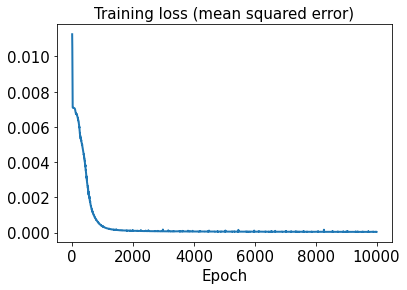

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

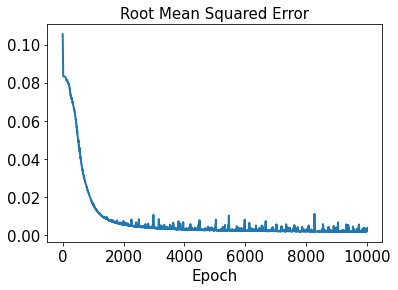

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

5/5 [==============================] - 0s 1ms/step - loss: 3.6492e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00049957074


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.00092771894


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00036858805, 0.0003806543, 0.00032100058, 0.00020612605, 0.00036781392, 0.0003690778, 0.00034659423, 0.00039866817, 0.00038651528, 0.00050652673, 0.00043094507, 0.00022817867, 0.00033247663, 0.0004452722, 0.0005254443, 0.0015236, 0.0011920527, 0.00026266187, 0.00085817074, 0.0003640996, 0.00049032073, 0.00021972263, 0.0005355205, 0.00063168723, 0.0023261323, 0.00045341003, 0.00019292266, 0.0002448692, 0.0010375296, 0.0010277597, 0.00031353388, 0.00045012796, 0.0003732748, 0.00042085198, 0.00032877206, 0.00030504752, 0.00030168262, 0.00020760148, 0.0009392107, 0.0006840309, 0.00029092617, 0.0004132827, 0.0006026731, 0.00059813616, 0.00023008634, 0.0005160285, 0.0017201857, 0.0005403611, 0.0013447775, 0.00031705195, 0.00045728363, 0.0003199318, 0.0005237298, 0.0006615999, 0.0006157501, 0.00031315818, 0.0012286105, 0.00042860862, 0.00034066764, 0.00021705512, 0.00019315234, 0.00039783234, 0.0002869032, 0.00082885014, 0.00030207587, 0.0005809825, 0.001199622, 0.000501791, 0.00017037851,

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0005726964, 0.002263335, 0.0009825001, 0.0006128201, 0.0005069653, 0.00081085996, 0.00066575676, 0.0006975948, 0.0005306262, 0.0004900448, 0.0007417725, 0.001224908, 0.0010264205, 0.0013206375, 0.0022169955]


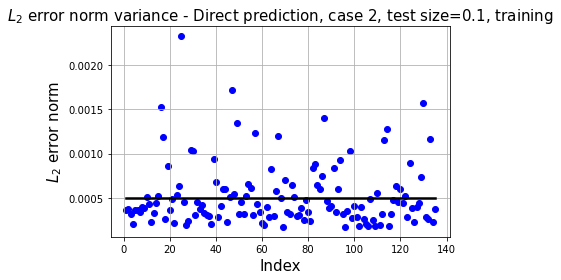

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

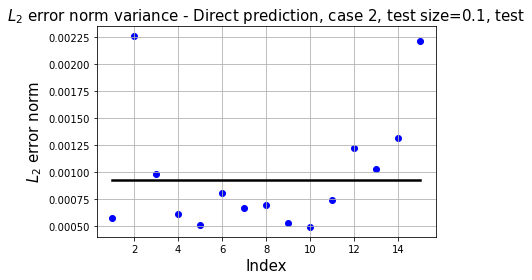

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

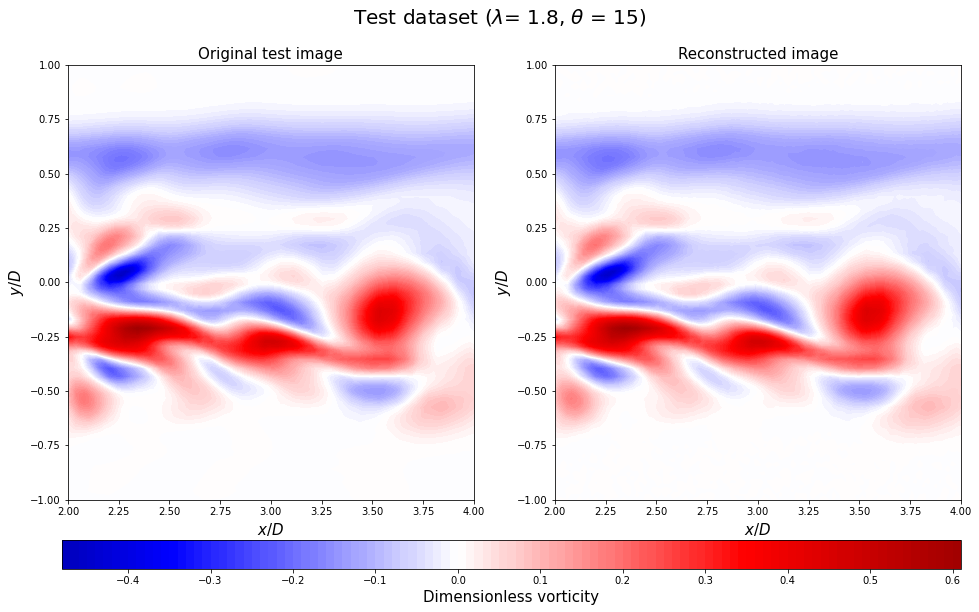

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

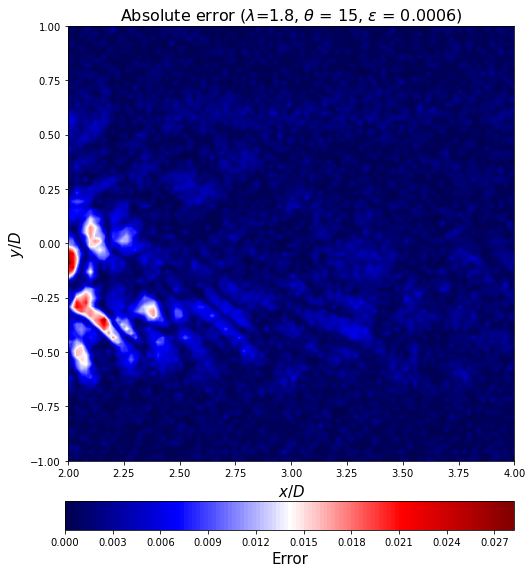

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()